# Merge all PVI datasets

Unfortunatley, data from 2002 on PVI is unavailable, so Data is limited to 2004-2021

In [1]:
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
#df108 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_108.csv")

In [3]:
df109 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_109.csv")

In [4]:
df110 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_110.csv")

In [5]:
df111 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_111.csv")

In [6]:
df112 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_112.csv")

In [7]:
df113 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_113.csv")

In [8]:
df114 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_114.csv")

In [9]:
df115 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_115.csv")

In [10]:
df116 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_116.csv")

In [11]:
df117 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_117.csv")

In [12]:
df = pd.concat([df109,df110,df111,df112,df113,df114,df115,df116,df117])

In [13]:
df.metric.unique()

array([0.62, 0.63, 0.54, 0.66, 0.56, 0.75, 0.33, 0.64, 0.52, 0.59, 0.36,
       0.4 , 0.51, 0.49, 0.5 , 0.61, 0.57, 0.29, 0.31, 0.14, 0.12, 0.41,
       0.53, 0.28, 0.32, 0.34, 0.47, 0.6 , 0.45, 0.55, 0.37, 0.25, 0.38,
       0.3 , 0.2 , 0.27, 0.17, 0.39, 0.23, 0.58, 0.43, 0.42, 0.48, 0.46,
       0.69, 0.15, 0.21, 0.74, 0.68, 0.73, 0.19, 0.67, 0.7 , 0.22, 0.44,
       0.35, 0.18, 0.24, 0.16, 0.09, 0.1 , 0.07, 0.65, 0.11, 0.76, 0.72,
       0.79, 0.13, 0.71, 0.26, 0.78, 0.8 , 0.08, 0.81, 0.82, 0.77, 0.06,
       0.83, 0.84])

In [14]:
df
df["PVI"] = df["PVI"].str.replace("D+0","R+0")

In [15]:
import numpy as np
import plotnine as p9
from plotnine import ggplot, aes, facet_grid, labs, geom_point, geom_smooth, coord_flip
from sklearn.linear_model import LinearRegression as lm
import warnings
warnings.filterwarnings('ignore')

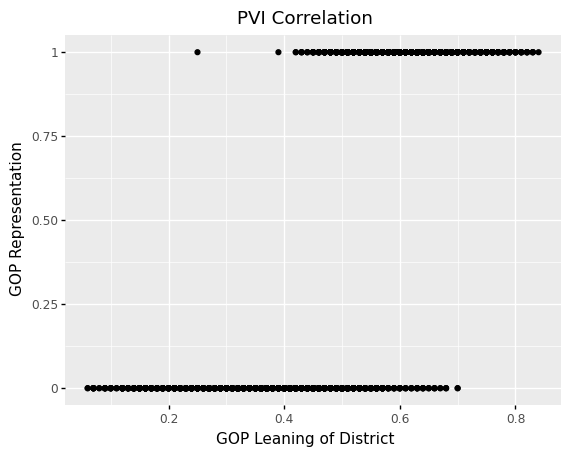

<ggplot: (8787051516176)>

In [16]:
# Create a super simple scatterplot to examine the relationship between PVI and congressional district
(p9.ggplot(data=df, mapping=p9.aes(x='metric', y='is_GOP'))
 + p9.geom_point() 
 + labs(x='GOP Leaning of District', y='GOP Representation',color="",title="PVI Correlation"))

In [17]:
#group by metric and average GOP seats
bm = df.groupby('metric').mean()
#this will not be produced into a dataset without aggregating all years, as 
bm = bm.reset_index()

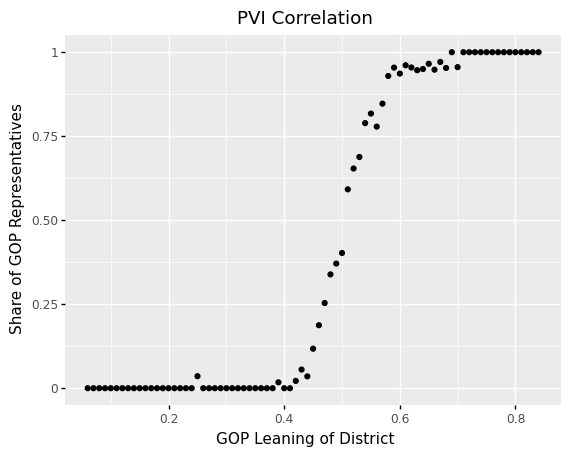

<ggplot: (8787056952113)>

In [18]:
#Plot averages
(p9.ggplot(data=bm, mapping=p9.aes(x='metric', y='is_GOP'))
 + p9.geom_point() 
 + labs(x='GOP Leaning of District', y="Share of GOP Representatives",color="",title="PVI Correlation"))

In [19]:
#now lets limit the data to only the R+10 to D+10 range, calling it Limited Domain
ld = bm[bm["metric"] <= .6]
ld = ld[ld["metric"] >= .4]

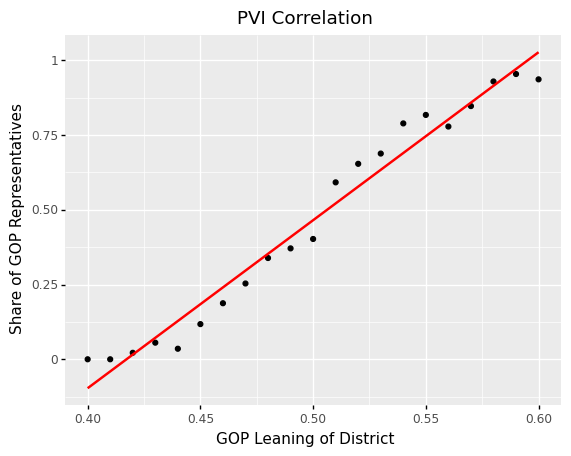

<ggplot: (8787045501817)>

In [20]:
#Plot averages
(p9.ggplot(data=ld, mapping=p9.aes(x='metric', y='is_GOP'))
 + p9.geom_point() 
 + geom_smooth(method = "lm", color = "red", se = False)
 + labs(x='GOP Leaning of District', y="Share of GOP Representatives",color="",title="PVI Correlation"))

In [32]:
binned = df
binned["bin"] = pd.cut(binned['metric'], 
    [0, .24, .42, .44, .45, .46, .47, .48, .49, .5,
    .51, .52, .53, .54, .57, .7, 1])
binned.bin = binned.bin.astype(str)
binned = binned.sort_values(by="metric")
binned

,year,congress,ST,ST#,seat,is_GOP,PVI,metric,bin
271,2018,116,NY,NY15,D,0,D+44,0.06,"(0.0, 0.24]"
271,2016,115,NY,NY15,D,0,D+44,0.06,"(0.0, 0.24]"
274,2004,109,NY,NY16,D,0,D+43,0.07,"(0.0, 0.24]"
269,2018,116,NY,NY13,D,0,D+43,0.07,"(0.0, 0.24]"
271,2014,114,NY,NY15,D,0,D+43,0.07,"(0.0, 0.24]"
273,2006,110,NY,NY15,D,0,D+43,0.07,"(0.0, 0.24]"
274,2006,110,NY,NY16,D,0,D+43,0.07,"(0.0, 0.24]"
273,2004,109,NY,NY15,D,0,D+43,0.07,"(0.0, 0.24]"
269,2016,115,NY,NY13,D,0,D+43,0.07,"(0.0, 0.24]"
271,2012,113,NY,NY15,D,0,D+43,0.07,"(0.0, 0.24]"


- 0 to .24 is solely Democratic
- .25 to .42 is less than 5% Republican
- .43 and .44 is less than 10% Republican
- .45 to .54 deserve their own bins
- .55 and .57 are more than 75% Republican
- .58 to .7 are more than 90% Republican
- .71 to 1 is solely Republican

In [22]:
#generate text for a dictionary for the replacement of the bins

dict_bin = pd.DataFrame(binned.bin.unique())
dict_bin["pvi"] = ["D+26+", "D+25 to D+8", "D+7 and D+6", "D+5", "D+4", "D+3", "D+2", "D+1", "EVEN", "R+1","R+2","R+3","R+4","R+5 to R+7","R+8 to R+20","R+21+"]
binned.bin = binned.bin.astype(str)
dict_bin[0] = dict_bin[0].astype(str)
dict_bin = dict_bin.rename(columns = {0:"bin","pvi":"range"})
dict_col = "'" + dict_bin.bin + "'" + " " + ":" + " " + "'" + dict_bin.range + "'" + ","
dict_col

0            '(0.0, 0.24]' : 'D+26+',
1     '(0.24, 0.42]' : 'D+25 to D+8',
2     '(0.42, 0.44]' : 'D+7 and D+6',
3             '(0.44, 0.45]' : 'D+5',
4             '(0.45, 0.46]' : 'D+4',
5             '(0.46, 0.47]' : 'D+3',
6             '(0.47, 0.48]' : 'D+2',
7             '(0.48, 0.49]' : 'D+1',
8             '(0.49, 0.5]' : 'EVEN',
9              '(0.5, 0.51]' : 'R+1',
10            '(0.51, 0.52]' : 'R+2',
11            '(0.52, 0.53]' : 'R+3',
12            '(0.53, 0.54]' : 'R+4',
13     '(0.54, 0.57]' : 'R+5 to R+7',
14     '(0.57, 0.7]' : 'R+8 to R+20',
15            '(0.7, 1.0]' : 'R+21+',
dtype: object

In [23]:
bin_dict = {
'(0.0, 0.24]' : 'D+26+',
'(0.24, 0.42]' : 'D+25 to D+8',
'(0.42, 0.44]' : 'D+7 to D+6',
'(0.44, 0.45]' : 'D+5',
'(0.45, 0.46]' : 'D+4',
'(0.46, 0.47]' : 'D+3',
'(0.47, 0.48]' : 'D+2',
'(0.48, 0.49]' : 'D+1',
'(0.49, 0.5]' : 'EVEN',
'(0.5, 0.51]' : 'R+1',
'(0.51, 0.52]' : 'R+2',
'(0.52, 0.53]' : 'R+3',
'(0.53, 0.54]' : 'R+4',
'(0.54, 0.57]' : 'R+5 to R+7',
'(0.57, 0.7]' : 'R+8 to R+20',
'(0.7, 1.0]' : 'R+21+',
}

In [24]:
df = binned.replace({"bin":bin_dict})

In [25]:
#group by metric and average GOP seats
sort = df.groupby('bin').mean()
sort = sort.sort_values(by="metric")
#this will not be produced into a dataset without aggregating all years, as 
sort = sort.reset_index()
sort

,bin,year,congress,is_GOP,metric
0,D+26+,2012.487654,113.243827,0.000000,0.176296
1,D+25 to D+8,2012.075640,113.037820,0.004449,0.351780
2,D+7 to D+6,2012.280255,113.140127,0.044586,0.435414
3,D+5,2011.600000,112.800000,0.117647,0.450000
4,D+4,2011.625000,112.812500,0.187500,0.460000
5,D+3,2011.070423,112.535211,0.253521,0.470000
6,D+2,2010.419355,112.209677,0.338710,0.480000
7,D+1,2012.000000,113.000000,0.370968,0.490000
8,EVEN,2011.073171,112.536585,0.402439,0.500000
9,R+1,2010.959184,112.479592,0.591837,0.510000


In [26]:
sort["bin"] = pd.Categorical(sort["bin"], ["D+26+","D+25 to D+8","D+7 to D+6","D+5","D+4","D+3","D+2","D+1",
                                          "EVEN","R+1","R+2","R+3","R+4","R+5 to R+7","R+8 to R+20","R+21+"])
sort = sort.sort_values("bin")

In [27]:
sort.sort_values("bin")

,bin,year,congress,is_GOP,metric
0,D+26+,2012.487654,113.243827,0.000000,0.176296
1,D+25 to D+8,2012.075640,113.037820,0.004449,0.351780
2,D+7 to D+6,2012.280255,113.140127,0.044586,0.435414
3,D+5,2011.600000,112.800000,0.117647,0.450000
4,D+4,2011.625000,112.812500,0.187500,0.460000
5,D+3,2011.070423,112.535211,0.253521,0.470000
6,D+2,2010.419355,112.209677,0.338710,0.480000
7,D+1,2012.000000,113.000000,0.370968,0.490000
8,EVEN,2011.073171,112.536585,0.402439,0.500000
9,R+1,2010.959184,112.479592,0.591837,0.510000


In [28]:
#import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
#ax.bar(sort.bin,sort.is_GOP)
#plt.show()

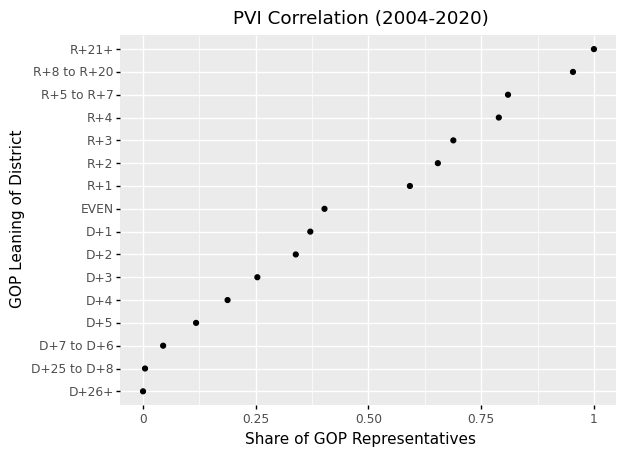

<ggplot: (8787057838839)>

In [30]:
#Plot averages
(p9.ggplot(data=sort, mapping=p9.aes(x='bin', y='is_GOP'))
 + p9.geom_point() 
 + labs(x='GOP Leaning of District', y="Share of GOP Representatives",color="",title="PVI Correlation (2004-2020)")) + coord_flip()

At this point you may be asking, "why the hell is he binning like that? you'd think it would at least be symmetrical?

The answer lies in the practicality of the data